# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 2

__Nombres de los estudiantes: Mario Jiménez, Alejandro Ramírez, David Seijas.

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [12]:
RANDOM_STATE=333

In [2]:
import pandas as pd
filename = "cleveland.csv"

df = pd.read_csv(filename)
df['sex'] = df['sex'].astype('category')
df = df.dropna() #Eliminando pacientes con datos incompletos

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [3]:
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [4]:
df.loc[df['target'] > 0, 'target'] = 'enfermo'
df.loc[df['target'] == 0, 'target'] = 'normal'
df



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [8]:
print(df['target'].value_counts())
df['target'].value_counts() / df['target'].count() * 100

normal     160
enfermo    137
Name: target, dtype: int64


normal     53.872054
enfermo    46.127946
Name: target, dtype: float64

En el dataFrame tenemos cargados 160 personas (53.88%) no enfermas y 137(46.12%) enfermas. Las clases a predecir están equilibradas. por ejemplo, si tan solo hubiera 3 enfermos y el modelo respondiese siempre con "normal", su tasa de accuracy sería de un 98.9%. Sin embargo ha fallado en todos los enfermos que debería de haber encontrado, por lo que su recall y precisión son ambas 0.
Así pues, observamos que si las clases están desequilibradas, la tasa de aciertos puede dar información incorrecta.

In [7]:
df.describe()


,age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


#### OBSERVACIONES
1. age: la media de edad de las personas analizadas es de 54 años, con una desviación tíìca de 9 años, por lo que la mayoría de los participantes se encuentran en un rango de entre [45,63] años. El menor de todos tiene 29 años y el mayor 77. El rango de edades tiene sentido , pues estamos tratando de detectar pacientes con enfermedades cardiovasculares.
2. trestbps: los datos de presión en sangre son muy homogéneos, a excepción de unos pocos pacientes ya que el mínimo se encuentra en 94. Sin embargo, son muy poquitos, pues ya el 75% está por encima de 120.
3. chol: en esta variable los datos están un poco más polarizados que las dos variables anteriores, pues la desviación típica es mayor en comparación al resto.
4. thalach: sucede algo muy parecido a trestbps, teniendo unos pocos pacientes valores extremos, mientras que la mayoría se encuentra entre 130 y 170.
5. oldpeak: en esta variable, la media no refleja bien la realidad, pues la desviación típica tiene un valor muy similar.

In [8]:
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.290476,0.202644,-0.394563,0.197123
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243
chol,0.202644,0.131536,1.000000,-0.000075,0.038596
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000


#### OBSERVACIONES
Ninguna variable esta muy relacionada con las otras. Por lo tanto, en nuestro problema no tenemos variables redundantes (al menos las numéricas). Si acaso mencionar la relación más fuerte, que se da entre la edad de los pacientes y el mayor pulso cardíaco medido. Esta relación es inversa, es decir, a mayor edad menor thalach anotado.

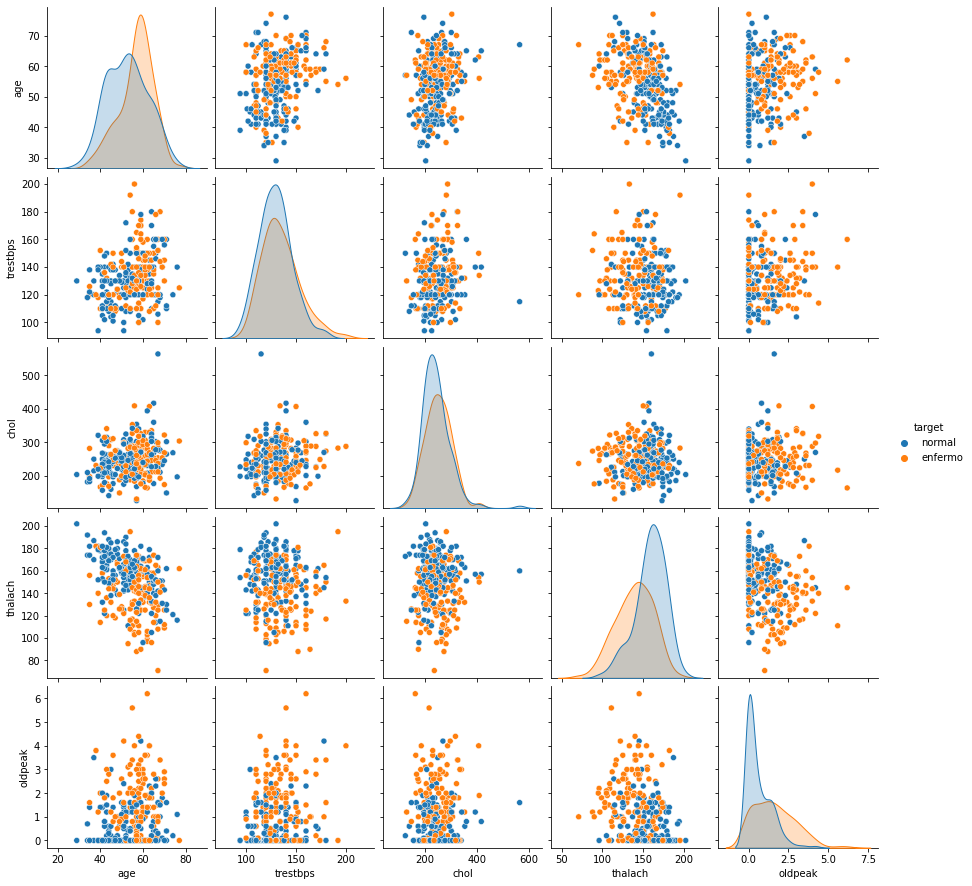

In [10]:
import seaborn as sns

sns.pairplot(df, diag_kind='kde', hue='target')

#### OBSERVACIONES
1. En cuanto a las variables numéricas por si solas, ninguna es capaz de separar las dos clases. Quizás destaca que si tenemos un peak por encima de 2.5, casi seguro que se trata de un paciente enfermo.
2. En cuanto a los pares de variable:
    1. La edad junto con otra variable no separa nada bien las clases. Se salva oldpeak, pero no por la acción de edad, si no por la del oldpeak.
    2. Al igual que con la edad sucede con el resto de variables a excepción de oldpeak.
3. En conclusión, observando las variables numéricas se advierte que va a ser un problema complicado de resolver.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

No es necesario escalar los datos en los árboles de decisión, ya que no se utilizan funciones que miden distancias entre diferentes puntos. Solo nos interesa la entropía de los nodos, en la que intervienen el nº de individuos de una clase u otra en función de si tomamos valores por debajo de uno fijo o por encima en un cierto atributo. Por lo tanto, da igual que un atributo sea 100 veces más grande que otro, ya que la entropía se centra en los propios atributos.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

df1 = df.drop(['target'], axis=1)
df2 = df['target']


Para cada profundidad máxima vamos a elegir el mejor mínimo nº de nodos necesarios para hacer la división.

In [16]:
train_accuracy = []
test_accuracy = []

from sklearn.model_selection import cross_validate
import numpy as np


for k in range(1,8): 
    print('Max depth: ' + str(k) +'\n')
    for sd in range(2,10):
        print('Min_samples_split: '+str(sd)+'\n')
        clf = DecisionTreeClassifier(criterion="entropy", max_depth=k, min_samples_split=sd, random_state=RANDOM_STATE)
        scores = cross_validate(clf, df1.values,df2.values, scoring='accuracy', cv=10, return_train_score=True)
        print(np.mean(scores['train_score']))
        print(np.mean(scores['test_score']))
        print('\n')
        train_accuracy.append(np.mean(scores['train_score']))
        test_accuracy.append(np.mean(scores['test_score']))
        
    
#train_accuracy, test_accuracy

Max depth: 1

Min_samples_split: 2

0.764682206942814
0.7404597701149426


Min_samples_split: 3

0.764682206942814
0.7404597701149426


Min_samples_split: 4

0.764682206942814
0.7404597701149426


Min_samples_split: 5

0.764682206942814
0.7404597701149426


Min_samples_split: 6

0.764682206942814
0.7404597701149426


Min_samples_split: 7

0.764682206942814
0.7404597701149426


Min_samples_split: 8

0.764682206942814
0.7404597701149426


Min_samples_split: 9

0.764682206942814
0.7404597701149426


Max depth: 2

Min_samples_split: 2

0.7706691262787189
0.7104597701149425


Min_samples_split: 3

0.7706691262787189
0.7104597701149425


Min_samples_split: 4

0.7706691262787189
0.7104597701149425


Min_samples_split: 5

0.7706691262787189
0.7104597701149425


Min_samples_split: 6

0.7706691262787189
0.7104597701149425


Min_samples_split: 7

0.7706691262787189
0.7104597701149425


Min_samples_split: 8

0.7706691262787189
0.7104597701149425


Min_samples_split: 9

0.7706691262787189
0.7104597

Observando los resultados decidimos escoger sd=5, pues obtiene los mejores resultados de accuracy (exactitud) sin llegar a sobreaprender en exceso. Por lo tanto, tenemos que sacar de los arrays ya calculados los valores que corresponden.

In [17]:
train_accuracy1 = []
test_accuracy1 = []
i=3
while i<len(train_accuracy):
    train_accuracy1.append(train_accuracy[i])
    test_accuracy1.append(test_accuracy[i])
    i+=8 #Saltar al siguiente con sd=5
train_accuracy1,test_accuracy1

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9132092347252503,
  0.9405263010788752,
  0.9562384705685056],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7641379310344828,
  0.763793103448276,
  0.7541379310344828,
  0.7742528735632184])

#### OBSERVACIONES
Analizando los datos de las poblaciones entrenadas y las usadas para los tests, se advierte que a partir de la profundidad 3 las tasas de accuracy de los tests no aumentan a la par que lo hacen las de entrenamientos, que son muy elevadas. Esto significa que el árbol sobreaprende en los trains, es decir, está muy ajustado a los datos de entrenamiento, generalizando peor en datos nuevos. Por lo tanto, conviene escoger profundidad k=3, que además fue la mejor en los tests.

Vamos a confirmar nuestra intuición con una curva de aprendizaje:

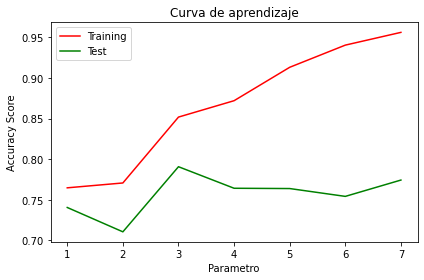

In [20]:
import matplotlib.pyplot as plt

max_depths = range(1, 8)
# Draw lines
plt.plot(max_depths, train_accuracy1, color="r",  label="Training")
plt.plot(max_depths, test_accuracy1, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()   

Reafirmamos nuestra decisión y todos los pensamientos que nos han llevado a ella.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:
- ¿Cuáles son las variables más importantes y en qué orden? 
- ¿Hay variables del conjunto de datos que no se han usado? 
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 
- ¿El árbol que hemos construido es capaz de separar las clases? 
- ¿En cuál de los nodos hoja existe mayor confusión?

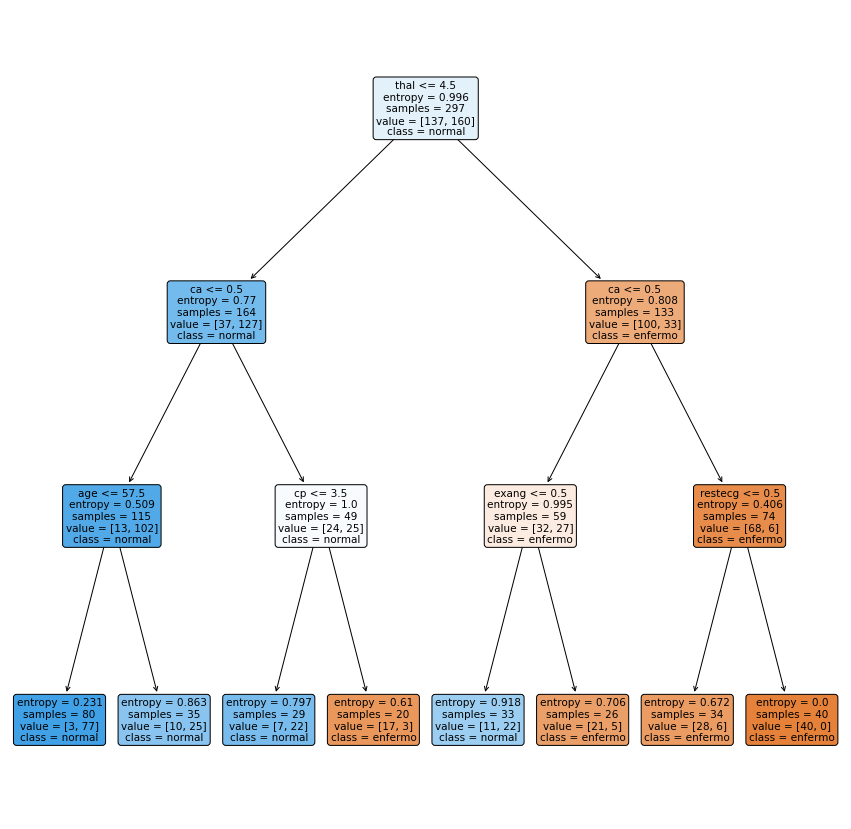

In [37]:
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=5, random_state=RANDOM_STATE)
clf = clf.fit(df1.values, df2.values)
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=df1.columns, class_names=['enfermo','normal'], rounded=True)
plt.show()

#### OBSERVACIONES
1. Las variables más importantes son las que primero se utilizan para crear el árbol de decisión, pues son las que separan mejor las clases (aumenta la disminución de entropía): thal y ca. Ambas son categóricas.
2. No hemos utilizado las siguientes variables: sex, trestbps, chol, fbs, thalach, oldpeak y slope
3. La tasa de accuracy con una única pregunta sería: (127+100)/297= 0.76
4. No separa por completo las dos clases, ya que en todos los nodos hojas menos uno hay pacientes normales y enfermos.
5. Como la entropía mide la ausencia de homogeneidad de un conjunto, el de mayor entropía será en el que exista una mayor confusión. Es el 5 por la izquierda, en el que tenemos 33 individuos, 22 de ellos normales, con una entropía de 0.918 

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=5, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, df1.values,df2.values, scoring=scoring_metrics, cv=10, return_train_score=True)
# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


#### OBSERVACIONES
1. Precisión: de todos los enfermos que ha pronosticado, un 81% de ellos sí estaba enfermo, mientras que el 19% restante son falsos positivos.
2. Exhaustividad o recall: de todos los enfermos entre los pacientes, hemos detectado un 79% de ellos.

Pese a la dificultad del problema, los datos de precisión y recall son más que aceptables. Sin embargo, si la enfermedad fuese mortal, buscaríamos un recall más elevado. Por el contrario, si al detectar falsos positivos estamos imponiéndoles un tratamiento muy agresivo, buscaremos una precisión más elevada. En nuestro caso, creemos que un modelo con un recall más elevado sería mejor, ya que las enfermedades cardiovasculares pueden causar serior problemas si no son detectadas a tiempo.

In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=5, random_state=RANDOM_STATE)
predictions = cross_val_predict(clf, df1.values, df2.values, cv=10)

# Informe por clases
cr = classification_report(df2.values,predictions, target_names=['normal', 'enfermo'])
print(cr)

              precision    recall  f1-score   support

      normal       0.82      0.71      0.76       137
     enfermo       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



#### OBSERVACIONES
1. En cuanto a la precisión, vemos que comete menos errores al detectar personas normales que enfermas, es decir, cuando dice que una persona no esta enferma, en un 82% es verdad; mientras que si dice que una persona está enferma, en un 78% es verdad.
2. En cuanto al recall, el árbol de decisión es mejor en los enfermos. Esto significa que de entre todos los pacientes enfermos los detecta mejor que a los normales de entre todo el conjunto de normales.
3. La métrica f1 se usa para guiarnos por una única medida, combinando las medidas simples vistas aquí o en clase. por lo tanto, si seguimos esta métrica observamos que el modelo se comporta mejor para enfermos que para personas normales.

In [38]:
# Función extraída de
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[ 97  40]
 [ 22 138]]


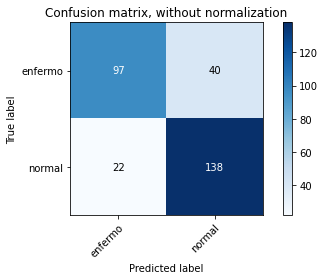

In [39]:
plot_confusion_matrix(df['target'], predictions, ['enfermo','normal'], normalize=False)

#### CONCLUSIONES
1. Gracias al previo estudio de las variables, nos hemos dado cuenta de la gran dificultad de este problema.
2. Por ello, creemos que los datos de precisión y recall de nuestro modelo son correctos, aunque mejorables. Es cierto que en un hospital se busca encontrar siempre a los enfermos, a la par que asegurar que una persona no tiene una enfermedad cardiovascular.
3. Con los árboles de decisión se consigue generalizar bastante bien. Sin embargo, en los casos más raros lo normal es que se confunda, ya que es posible que en una de las preguntas el atributo indique justo lo contrario a la enfermedad del paciente. Por lo tanto, para encontrar claros enfermos creemos que es una buena herramienta, ya que en un 80% de las veces detecta a los enfermos. A pesar de ello, debe ser complementada con la opinión de expertos en los casos que parezcan más dudosos, así como con múltiples pruebas que determinen si en efecto el paciente está enfermo.
4. Otro de los problemas del modelo es que existen veces en las que un paciente que no posee la enfermedad si es diagnosticado como enfermo. Por lo tanto, antes de someterlo a un tratamiento es necesaria la interveción de un experto.
5. En cuanto a su utilidad en un hospital, esta herramienta se puede utilizar como método de prevención para personas que tienen dudas de si estan enfermas, en los casos en los que sus valores se encuentren en una rama con entropía 0. En el resto de casos, debido a la posible gravedad de la enfermedad, creemos firmemente que siguen siendo necesarias pruebas que demuestren la enfermedad, así como la presencia de un experto que entienda las pruebas y pueda determinar con exactitud el diagnóstico.